In [1]:
import GAN.models as models
import GAN.cms_datasets as cms
import GAN.plotting as plotting
import GAN.preprocessing as preprocessing
import GAN.base as base

Using TensorFlow backend.


In [2]:
import GAN.utils as utils

reload(utils)

class Parameters(utils.Parameters):
        
    g_opts=utils.param(dict(name="G_64x5",kernel_sizes=[32,64,128,256],do_weight_reg=1e-2))
    d_opts=utils.param(dict(name="D_256x5",kernel_sizes=[256]*5,
                        clip_weights=2.e-2,activation=None)) # weight clipping and no actication
    dm_opts=utils.param(dict(optimizer="RMSprop",opt_kwargs=dict(lr=0.0001)))#, decay=6e-6)))
    am_opts=utils.param(dict(optimizer="RMSprop",opt_kwargs=dict(lr=0.0001)))#, decay=6e-6)))
    
    epochs=utils.param(200)
    batch_size=utils.param(4096)
    plot_every=utils.param(5)
    
    # frac_data=utils.param(10)
    
    loss = "wgan_loss" # use WGAN loss 
    gan_targets = 'gan_targets_hinge' # hinge targets are 1, -1 instead of 0, 1
    schedule = [0]*2+[1] # number of critic iterations per generators iteration
    
    monitor_dir = utils.param('log')
    
class MyApp(utils.MyApp):
    classes = utils.List([Parameters])

notebook_parameters = Parameters(MyApp()).get_params()

globals().update(notebook_parameters)
DM_OPTS.update( {"loss":LOSS} )
AM_OPTS.update( {"loss":LOSS} )
notebook_parameters


{'AM_OPTS': {'loss': 'wgan_loss',
  'opt_kwargs': {'lr': 0.0001},
  'optimizer': 'RMSprop'},
 'BATCH_SIZE': 4096,
 'DM_OPTS': {'loss': 'wgan_loss',
  'opt_kwargs': {'lr': 0.0001},
  'optimizer': 'RMSprop'},
 'D_OPTS': {'activation': None,
  'clip_weights': 0.02,
  'kernel_sizes': [256, 256, 256, 256, 256],
  'name': 'D_256x5'},
 'EPOCHS': 200,
 'GAN_TARGETS': 'gan_targets_hinge',
 'G_OPTS': {'do_weight_reg': 0.0002,
  'kernel_sizes': [32, 64, 128, 256],
  'name': 'G_64x5'},
 'LOSS': 'wgan_loss',
 'PLOT_EVERY': 5,
 'SCHEDULE': [0, 0, 1]}

In [3]:
import GAN.toy_datasets as toys

In [4]:
reload(toys)
c_train,c_test,x_train,x_test,z_train,z_test =  toys.three_peaks_conditional_cube(2000000)

(2000000, 1, 1) (2000000, 1, 1) (2000000, 1, 1)
(2000000, 1, 1) (2000000, 1, 1) (2000000, 1, 1)


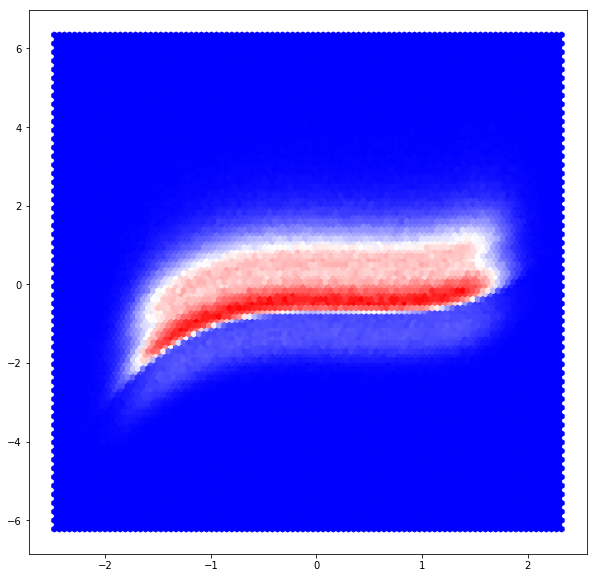

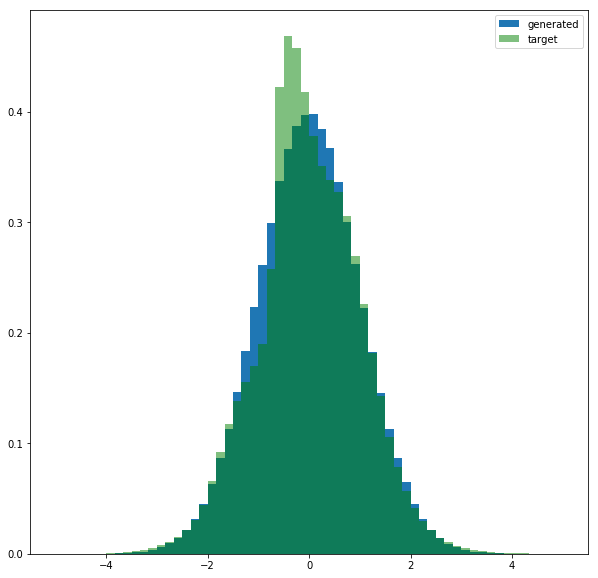

In [5]:
plt.hexbin( c_train.ravel(), x_train.ravel() )
plt.show()
plotting.plot_hists(x_train.ravel(),z_train.ravel())#,range=[-4,10])

In [6]:
xz_shape = x_train.shape[1:]
c_shape = c_train.shape[1:]

In [7]:
xz_shape

(1, 1)

In [8]:
reload(models)

gan = models.MyFFGAN( xz_shape, xz_shape, c_shape=c_shape,
                     g_opts=G_OPTS,
                     d_opts=D_OPTS,
                     dm_opts=DM_OPTS,
                     am_opts=AM_OPTS,
                     gan_targets=GAN_TARGETS
                    )

In [9]:
gan.get_generator()

(1, 1)


In [10]:
gan.get_discriminator()

WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02
WeightClip 0.02


(<keras.engine.training.Model at 0x2b5c7d3b1e48>,
 <keras.engine.training.Model at 0x2b5c7d3b1940>)

In [11]:
gan.adversarial_compile(loss=LOSS,schedule=SCHEDULE)

wgan_loss


In [12]:
gan.get_generator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_64x5_c_input (InputLayer)      (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_64x5_input (InputLayer)        (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_64x5_all_inputs (Concatenate)  (None, 1, 2)          0           G_64x5_c_input[0][0]             
                                                                   G_64x5_input[0][0]               
____________________________________________________________________________________________________
G_64x5_up1_dense (Dense)         (None, 1, 256)        768         G_64x5_all_inputs[0][0] 

In [13]:
# gan.get_discriminator().summary()

In [14]:
# gan.am.summary()

In [15]:
# gan.dm.summary()

In [16]:
# gan.gan.summary()

In [17]:
# gan.gan.outputs, gan.gan.inputs

/users/musella/jupyter/GAN/GAN/base.py:179: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  callbacks = [checkpoint,csv,tensorboard,plotter], **kwargs


calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
calling WeightClip 0.02
Epoch 1/201
1499136/1500000 [============================>.] - ETA: 0s - loss: 0.1071 - discriminator_loss: 0.0493 - discriminator_model_2_loss: 0.0271 - discriminator_D_256x5_output_loss: -0.0313 - generator_loss: 0.0578 - generator_model_3_loss: -0.0271 - generator_D_256x5_output_loss: 0.0313           [-2.1707997829620935, 2.0175459014303696]
[-1.414192372560501, 2.0102448123566781]
[-0.95023128986358651, 1.9995040033785139]
[-0.91602052166432557, 2.2017407178878763]
[-0.91650795491705539, 2.4873297572135913]
[-0.92755347325415416, 2.6421164274215698]
[-0.92191305341739294, 2.7325156927108756]


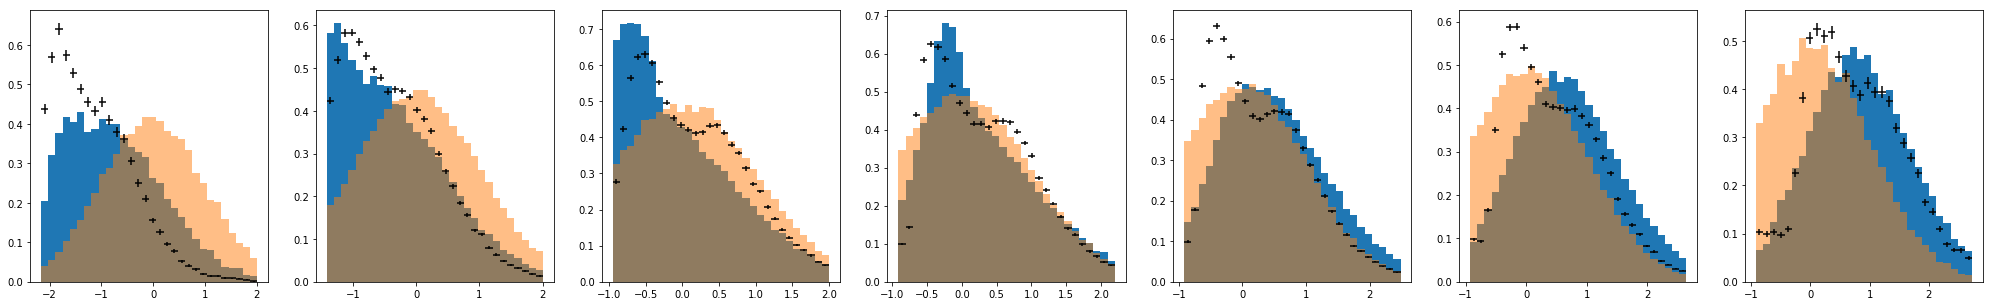

[-0.12146046012639999, 0.19283143132925021]


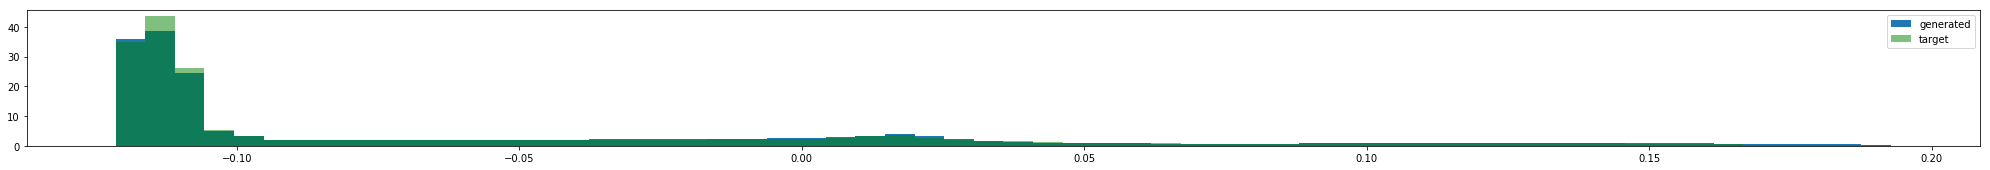

1500000/1500000 [==============================] - 68s - loss: 0.1071 - discriminator_loss: 0.0493 - discriminator_model_2_loss: 0.0271 - discriminator_D_256x5_output_loss: -0.0313 - generator_loss: 0.0578 - generator_model_3_loss: -0.0271 - generator_D_256x5_output_loss: 0.0313    
Epoch 2/201
1500000/1500000 [==============================] - 18s - loss: 0.0919 - discriminator_loss: 0.0329 - discriminator_model_2_loss: 0.1340 - discriminator_D_256x5_output_loss: -0.1471 - generator_loss: 0.0590 - generator_model_3_loss: -0.1340 - generator_D_256x5_output_loss: 0.1471      ETA: 17s - loss: 0.0983 - discriminator_loss: 0.0451 - discriminator_model_2_loss: 0.0611 - discrim
Epoch 3/201
1500000/1500000 [==============================] - 18s - loss: 0.0817 - discriminator_loss: 0.0309 - discriminator_model_2_loss: 0.3779 - discriminator_D_256x5_output_loss: -0.3878 - generator_loss: 0.0508 - generator_model_3_loss: -0.3779 - generator_D_256x5_output_loss: 0.3878    - ETA: 7s - loss: 0.0835

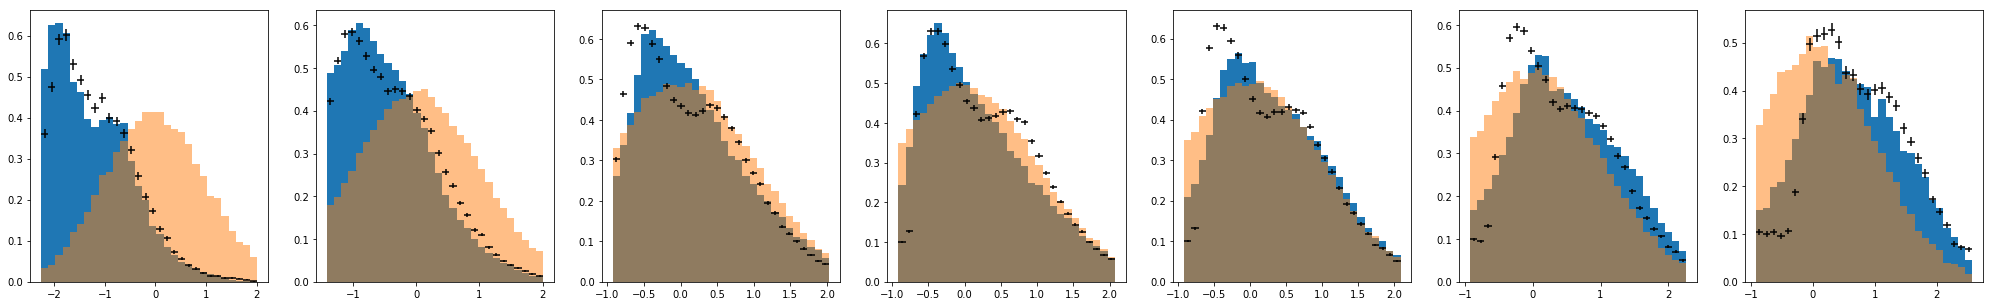

[-0.22567487359046934, 0.15353203564882273]


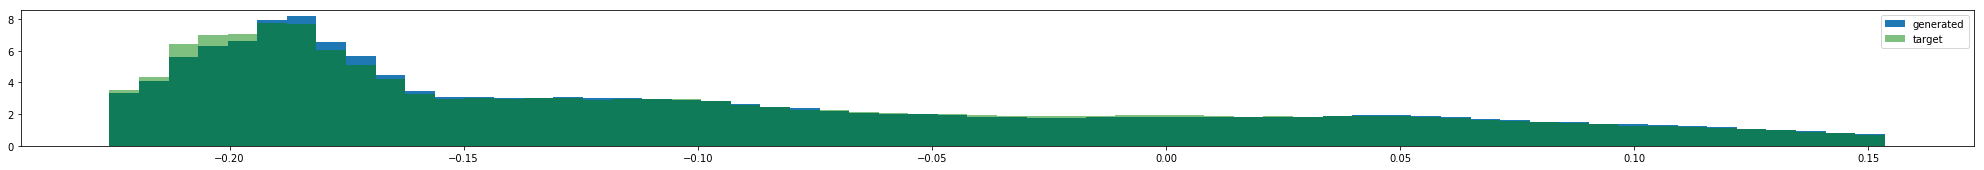

1500000/1500000 [==============================] - 68s - loss: 0.0618 - discriminator_loss: 0.0274 - discriminator_model_2_loss: 0.2272 - discriminator_D_256x5_output_loss: -0.2307 - generator_loss: 0.0344 - generator_model_3_loss: -0.2272 - generator_D_256x5_output_loss: 0.2307    
Epoch 7/201
1500000/1500000 [==============================] - 19s - loss: 0.0571 - discriminator_loss: 0.0244 - discriminator_model_2_loss: 0.0987 - discriminator_D_256x5_output_loss: -0.1028 - generator_loss: 0.0327 - generator_model_3_loss: -0.0987 - generator_D_256x5_output_loss: 0.1028    
Epoch 8/201
1500000/1500000 [==============================] - 18s - loss: 0.0535 - discriminator_loss: 0.0225 - discriminator_model_2_loss: 0.0700 - discriminator_D_256x5_output_loss: -0.0743 - generator_loss: 0.0310 - generator_model_3_loss: -0.0700 - generator_D_256x5_output_loss: 0.0743    
Epoch 9/201
1500000/1500000 [==============================] - 18s - loss: 0.0504 - discriminator_loss: 0.0206 - discriminat

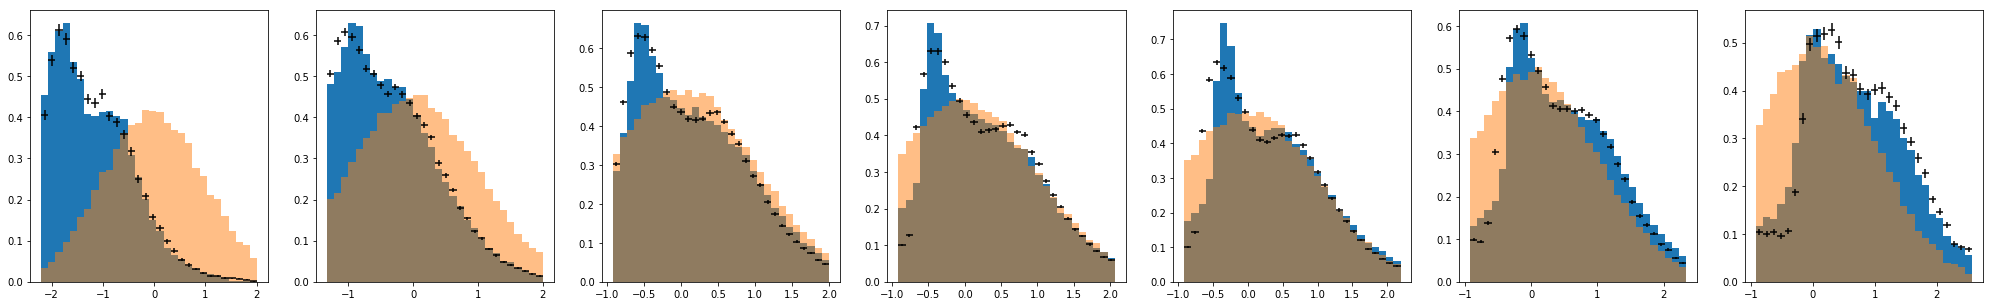

[-0.1023152686655521, 0.14244886413216587]


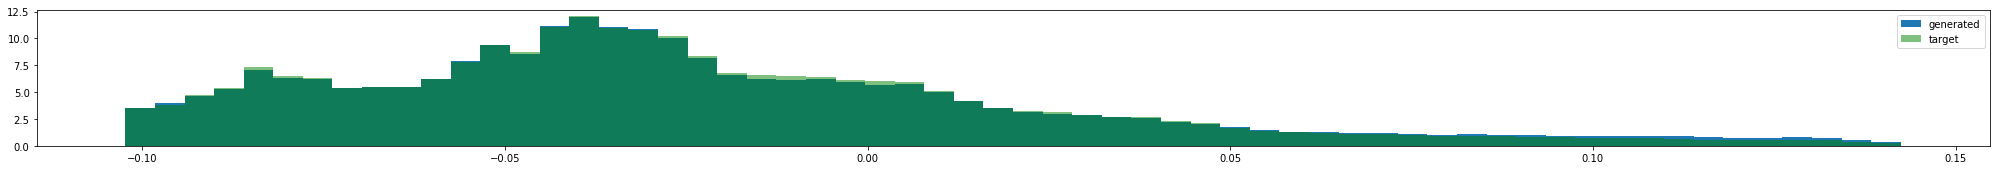

1500000/1500000 [==============================] - 67s - loss: 0.0460 - discriminator_loss: 0.0179 - discriminator_model_2_loss: 0.0011 - discriminator_D_256x5_output_loss: -0.0062 - generator_loss: 0.0282 - generator_model_3_loss: -0.0011 - generator_D_256x5_output_loss: 0.0062    
Epoch 12/201
1500000/1500000 [==============================] - 18s - loss: 0.0442 - discriminator_loss: 0.0168 - discriminator_model_2_loss: -0.0225 - discriminator_D_256x5_output_loss: 0.0173 - generator_loss: 0.0274 - generator_model_3_loss: 0.0225 - generator_D_256x5_output_loss: -0.0173    
Epoch 13/201
1500000/1500000 [==============================] - 18s - loss: 0.0427 - discriminator_loss: 0.0162 - discriminator_model_2_loss: -0.0217 - discriminator_D_256x5_output_loss: 0.0165 - generator_loss: 0.0266 - generator_model_3_loss: 0.0217 - generator_D_256x5_output_loss: -0.0165    
Epoch 14/201
1500000/1500000 [==============================] - 18s - loss: 0.0415 - discriminator_loss: 0.0157 - discrimi

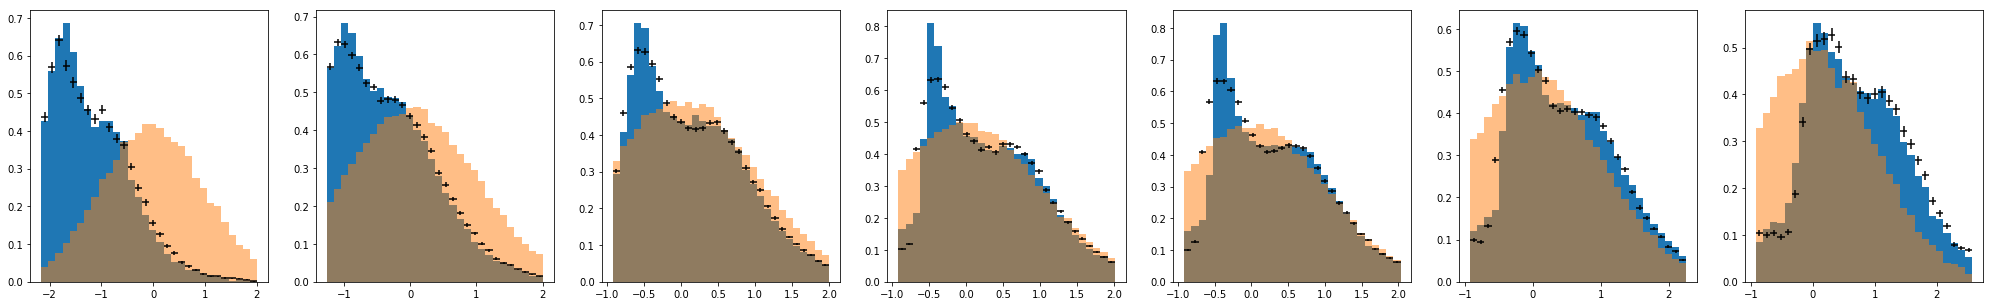

[0.026243185205385093, 0.2353737264871596]


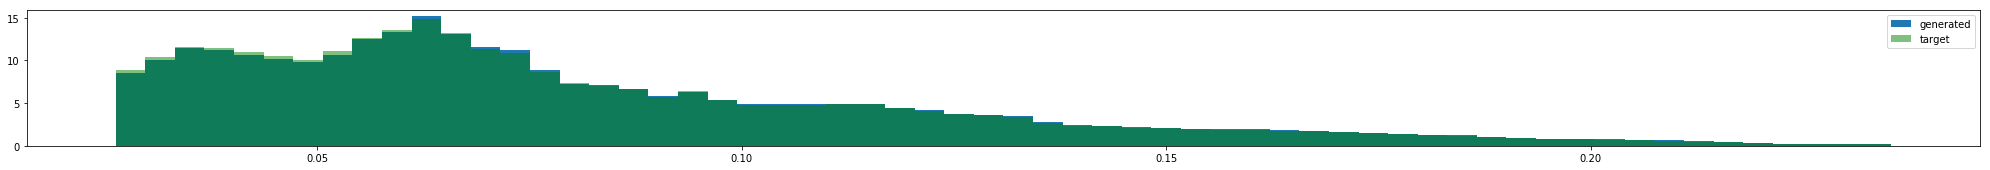

1500000/1500000 [==============================] - 67s - loss: 0.0397 - discriminator_loss: 0.0158 - discriminator_model_2_loss: -0.0177 - discriminator_D_256x5_output_loss: 0.0137 - generator_loss: 0.0238 - generator_model_3_loss: 0.0177 - generator_D_256x5_output_loss: -0.0137    
Epoch 17/201
1500000/1500000 [==============================] - 18s - loss: 0.0389 - discriminator_loss: 0.0161 - discriminator_model_2_loss: -0.0140 - discriminator_D_256x5_output_loss: 0.0106 - generator_loss: 0.0228 - generator_model_3_loss: 0.0140 - generator_D_256x5_output_loss: -0.0106    
Epoch 18/201
 688128/1500000 [============>.................] - ETA: 10s - loss: 0.0384 - discriminator_loss: 0.0164 - discriminator_model_2_loss: -0.0044 - discriminator_D_256x5_output_loss: 0.0015 - generator_loss: 0.0221 - generator_model_3_loss: 0.0044 - generator_D_256x5_output_loss: -0.0015

KeyboardInterrupt: 

In [18]:
reload(base)

initial_epoch = 0
if hasattr(gan.model,"history"):
    initial_epoch = gan.model.history.epoch[-1]

do = dict(
    x_train=x_train,
    z_train=z_train,
    c_x_train=c_train,
    c_z_train=c_train,
          
    x_test=x_test,
    z_test=z_test,
    c_x_test=c_test,
    c_z_test=c_test,
    
    n_epochs=EPOCHS + initial_epoch +1,
    initial_epoch=initial_epoch,
    batch_size=BATCH_SIZE,
    plot_every=PLOT_EVERY,
    
     monitor_dir=MONITOR_DIR
)

base.MyGAN.adversarial_fit(gan,**do)


In [ ]:
x_morphed = gan.get_generator().predict([c_test,z_test])[1]

x_p = gan.get_discriminator()[1].predict([c_test,x_test])
z_p   = gan.get_discriminator()[1].predict([c_test,x_morphed])

In [ ]:
reload(plotting)

quantiles = np.percentile(c_test,[0,5,20,40,60,80,95,100])

plotting.plot_summary_cond(x_test,c_test,x_morphed,c_test,z_test,x_p,z_p,
                           do_slices=False,c_bounds=quantiles)
plotting.plot_summary_cond(x_test,c_test,x_morphed,c_test,z_test,x_p,z_p,
                           do_slices=True,c_bounds=quantiles)


In [ ]:
gan.model.train_function